In [1]:
!date

Thu Jul  6 03:39:19 PDT 2023


In [2]:
!echo $CONDA_PREFIX 

/c4/home/derek/miniconda3/envs/scquint_4


In [3]:
import sys
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import scanpy as sc

In [4]:
#!conda install --yes --prefix {sys.prefix}  -c conda-forge adjusttext 

In [5]:
input_dir= '/c4/home/derek/data1/derek/data_scSLR/PBMC/'


In [6]:
output_dir = '/c4/home/derek/data1/derek/scSLR/notebooks/fig2/plots/'
os.makedirs(output_dir, exist_ok=True)

In [7]:
adata_exp = sc.read_h5ad(input_dir+'/concat.3.new.h5ad')

adata_exp = adata_exp[(adata_exp.obs['pool_well'] == '5_1') | (adata_exp.obs['pool_well'] == '5_2')]

adata_exp.obs_names = adata_exp.obs_names.str.replace(pat='-1-22',repl='-0').str.replace(pat='-1-23',repl='-1')

adata_5prime = sc.read_h5ad('/c4/home/derek/data1/derek/data_scSLR/PBMC/5prime_exp_h5ad')

adata_exp = adata_exp[adata_exp.obs_names.isin(adata_5prime.obs_names)]

adata_exp.obsm['X_umap'] = adata_5prime.obsm['X_umap']

/c4/home/derek/miniconda3/envs/scquint_4/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/c4/home/derek/miniconda3/envs/scquint_4/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


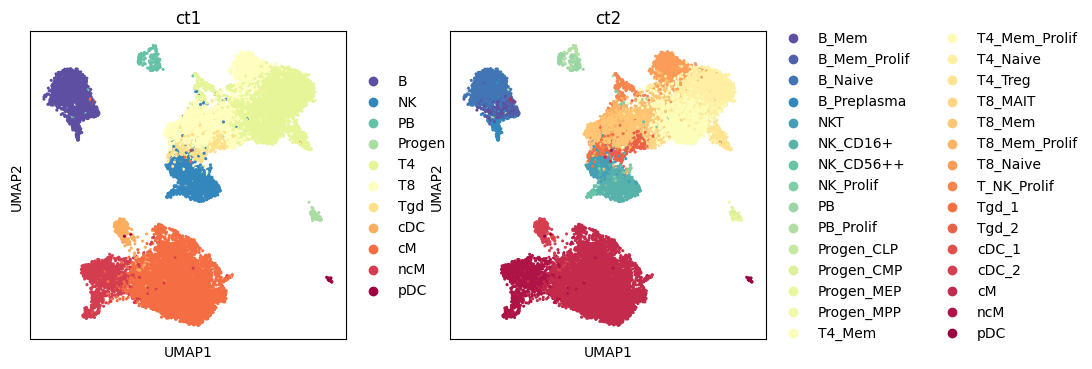

In [8]:
plt.rcParams['figure.figsize'] = 4,4

sc.pl.umap(adata_exp,
          color=['ct1','ct2'],
          palette='Spectral_r',
          size=20)

In [9]:
adata_exp

AnnData object with n_obs × n_vars = 19087 × 18450
    obs: 'n_counts_mrna', 'n_counts_adts', 'NUM.SNPS', 'NUM.READS', 'DROPLET.TYPE', 'BEST.GUESS', 'percent_mito', 'pool', 'well', 'pool_well', 'batch', 'pool_clust', 'freemux_cluster', 'donor', 'timepoint', 'respiratory_support_D0', 'onset_to_D0_days', 'intubated_days', 'admission_to_discharge', 'D0_to_death', 'race', 'sex', 'ethnicity', 'consent', 'death', 'pulmonary_infection', 'non_pulmonary_infection', 'leiden', 'onset_to_D0_days-as_float', 'D0_to_death-as_float', 'original_leiden', 'ct1', 'ct2', 'ct3', 'RBC', 'WBC_count1', 'WBC_count2', 'WBC_count3', 'Lymphocyte_count', 'Monocyte_count', 'cell_group', 'exclude_restricted', 'IFN_shared_score', 'IFN_beta_score', 'IFN_gamma_score', 'actual_timepoint', 'CT_1', 'CT_2', 'CT_Host', 'dCT_1', 'dCT_2', 'days_from_start', 'COVID_status', 'admission_level', 'respiratory_support', 'NIH_clinical', 'COVID_severity', 'COVID_severity_merged', 'NIH_ordinal'
    var: 'feature_types', 'genome', 'gene

In [10]:
cat_list = adata_exp.obs.ct2.cat.categories.tolist()

In [11]:
cat_list

['B_Mem',
 'B_Mem_Prolif',
 'B_Naive',
 'B_Preplasma',
 'NKT',
 'NK_CD16+',
 'NK_CD56++',
 'NK_Prolif',
 'PB',
 'PB_Prolif',
 'Progen_CLP',
 'Progen_CMP',
 'Progen_MEP',
 'Progen_MPP',
 'T4_Mem',
 'T4_Mem_Prolif',
 'T4_Naive',
 'T4_Treg',
 'T8_MAIT',
 'T8_Mem',
 'T8_Mem_Prolif',
 'T8_Naive',
 'T_NK_Prolif',
 'Tgd_1',
 'Tgd_2',
 'cDC_1',
 'cDC_2',
 'cM',
 'ncM',
 'pDC']

In [12]:
adata_exp.obs.ct1.cat.categories.tolist()

['B', 'NK', 'PB', 'Progen', 'T4', 'T8', 'Tgd', 'cDC', 'cM', 'ncM', 'pDC']

In [13]:
simplify_dict = {'B_Mem':'B cells',
 'B_Mem_Prolif':'B cells',
 'B_Naive':'B cells',
 'B_Preplasma':'B cells',
 'NKT':'NK cells',
 'NK_CD16+':'NK cells',
 'NK_CD56++':'NK cells',
 'NK_Prolif':'NK cells',
 'PB':'Plasmablasts',
 'PB_Prolif':'Plasmablasts',
 'Progen_CLP':'Hematopoietic progenitors',
 'Progen_CMP':'Hematopoietic progenitors',
 'Progen_MEP':'Hematopoietic progenitors',
 'Progen_MPP':'Hematopoietic progenitors',
 'T4_Mem':'Memory CD4 T cells',
 'T4_Mem_Prolif':'Memory CD4 T cells',
 'T4_Naive':'Naïve CD4 T cells',
 'T4_Treg':'Regulatory CD4 T cells',
 'T8_MAIT':'MAIT cells',
 'T8_Mem':'Memory CD8 T cells',
 'T8_Mem_Prolif':'Memory CD8 T cells',
 'T8_Naive':'Naive CD8 T cells',
 'T_NK_Prolif':'Memory CD4 T cells',
 'Tgd_1':'γδ T cells',
 'Tgd_2':'γδ T cells',
 'cDC_1':'Dendritic cells',
 'cDC_2':'Dendritic cells',
 'cM':'Classic monocytes',
 'ncM':'Non-classic monocytes',
 'pDC':'Plasmacytoid dendritic cells'}

In [14]:
adata_exp.obs['celltype'] = adata_exp.obs.ct2.map(simplify_dict)

/c4/home/derek/miniconda3/envs/scquint_4/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


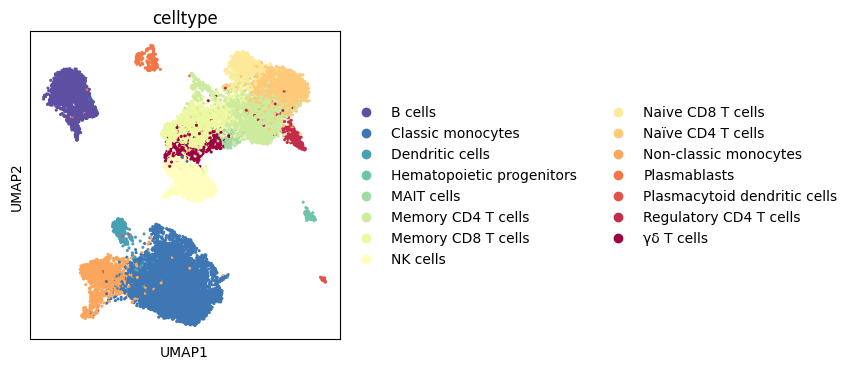

In [15]:
plt.rcParams['figure.figsize'] = 4,4

sc.pl.umap(adata_exp,
          color=['celltype'],
          palette='Spectral_r',
          size=20)

In [16]:
adata_exp.obs.celltype.cat.categories

Index(['B cells', 'Classic monocytes', 'Dendritic cells',
       'Hematopoietic progenitors', 'MAIT cells', 'Memory CD4 T cells',
       'Memory CD8 T cells', 'NK cells', 'Naive CD8 T cells',
       'Naïve CD4 T cells', 'Non-classic monocytes', 'Plasmablasts',
       'Plasmacytoid dendritic cells', 'Regulatory CD4 T cells', 'γδ T cells'],
      dtype='object')

In [17]:
adata_exp.obs.celltype = adata_exp.obs.celltype.cat.reorder_categories(
['B cells',
  'Plasmablasts',
 'Naïve CD4 T cells',
 'Memory CD4 T cells',
 'Regulatory CD4 T cells',
 'Naive CD8 T cells',
 'Memory CD8 T cells',
  'MAIT cells',
  'γδ T cells',
 'NK cells',
 'Classic monocytes',
 'Non-classic monocytes',
 'Dendritic cells',
 'Plasmacytoid dendritic cells',
'Hematopoietic progenitors',
])

/c4/home/derek/miniconda3/envs/scquint_4/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


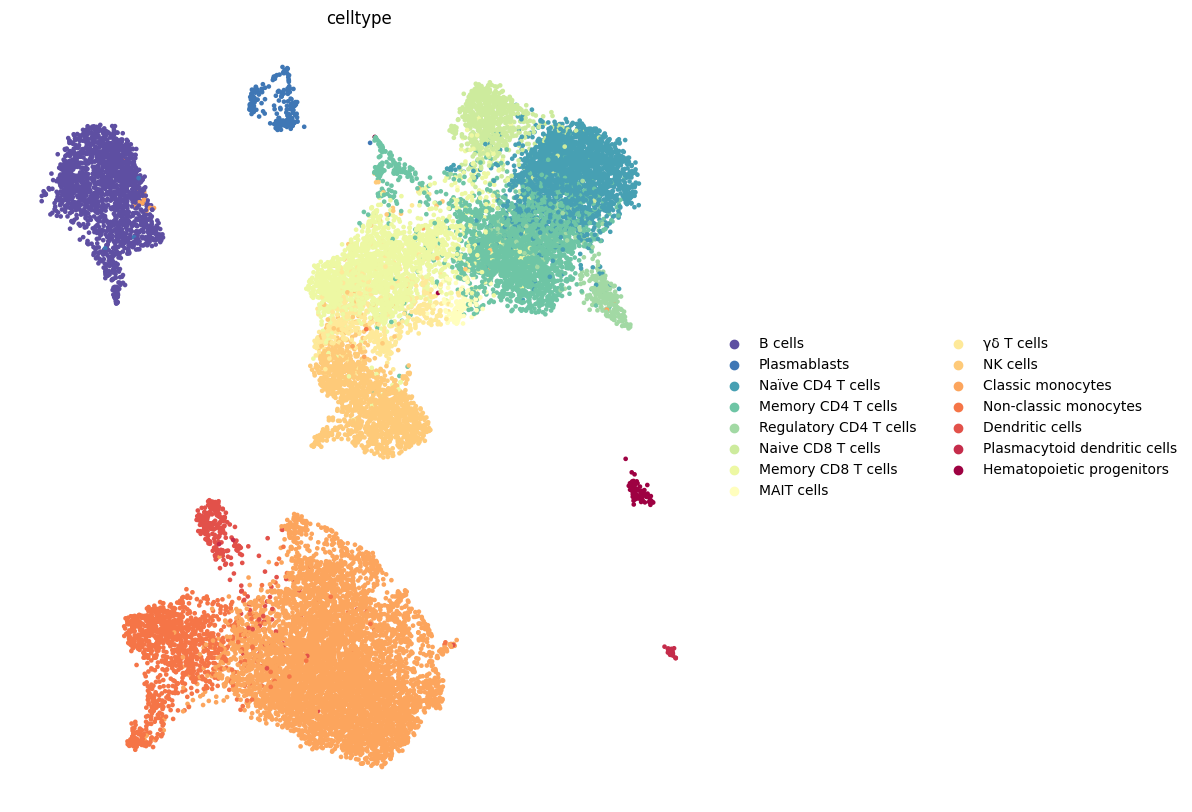

In [18]:
plt.rcParams['figure.figsize'] = 9,10

sc.pl.umap(adata_exp,
          color=['celltype'],
          palette='Spectral_r',
          # legend_loc='on data',
          size=45,
          frameon=False,
           save='_celltype.pdf'
          )

In [21]:
pd.DataFrame(
    zip(adata_exp.obs.celltype.cat.categories,
adata_exp.uns['celltype_colors'],
)
).to_csv('celltype_colors.csv',columns=None,index=None)

In [23]:
adata_exp.write_h5ad(input_dir+'gene_expression.h5ad'

AnnData object with n_obs × n_vars = 19087 × 18450
    obs: 'n_counts_mrna', 'n_counts_adts', 'NUM.SNPS', 'NUM.READS', 'DROPLET.TYPE', 'BEST.GUESS', 'percent_mito', 'pool', 'well', 'pool_well', 'batch', 'pool_clust', 'freemux_cluster', 'donor', 'timepoint', 'respiratory_support_D0', 'onset_to_D0_days', 'intubated_days', 'admission_to_discharge', 'D0_to_death', 'race', 'sex', 'ethnicity', 'consent', 'death', 'pulmonary_infection', 'non_pulmonary_infection', 'leiden', 'onset_to_D0_days-as_float', 'D0_to_death-as_float', 'original_leiden', 'ct1', 'ct2', 'ct3', 'RBC', 'WBC_count1', 'WBC_count2', 'WBC_count3', 'Lymphocyte_count', 'Monocyte_count', 'cell_group', 'exclude_restricted', 'IFN_shared_score', 'IFN_beta_score', 'IFN_gamma_score', 'actual_timepoint', 'CT_1', 'CT_2', 'CT_Host', 'dCT_1', 'dCT_2', 'days_from_start', 'COVID_status', 'admission_level', 'respiratory_support', 'NIH_clinical', 'COVID_severity', 'COVID_severity_merged', 'NIH_ordinal', 'celltype'
    var: 'feature_types', 'ge

In [ ]:
vivid = [px.colors.unlabel_rgb(i) for i in px.colors.qualitative.Spectral]

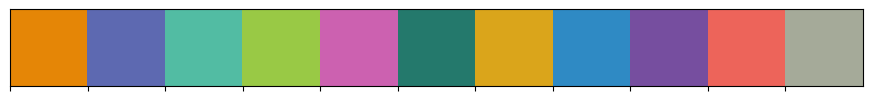

In [17]:
sns.palplot(
    [px.colors.unconvert_from_RGB_255(i) for i in vivid]
)

In [18]:
greys = [px.colors.unlabel_rgb(i) for i in px.colors.sequential.Greys]

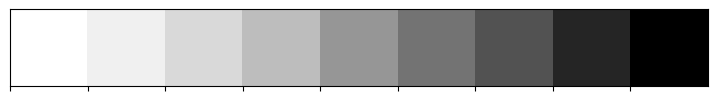

In [19]:
sns.palplot(
    [px.colors.unconvert_from_RGB_255(i) for i in greys]
)

In [20]:
[px.colors.unconvert_from_RGB_255(i) for i in greys]

[(1.0, 1.0, 1.0),
 (0.9411764705882353, 0.9411764705882353, 0.9411764705882353),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7411764705882353, 0.7411764705882353, 0.7411764705882353),
 (0.5882352941176471, 0.5882352941176471, 0.5882352941176471),
 (0.45098039215686275, 0.45098039215686275, 0.45098039215686275),
 (0.3215686274509804, 0.3215686274509804, 0.3215686274509804),
 (0.1450980392156863, 0.1450980392156863, 0.1450980392156863),
 (0.0, 0.0, 0.0)]

In [72]:
px.colors.n_colors([px.colors.unconvert_from_RGB_255(i) for i in vivid][3],
                   [px.colors.unconvert_from_RGB_255(i) for i in vivid][6],
                   3
)[:-1]

[(0.6, 0.788235294117647, 0.27058823529411763),
 (0.7274509803921568, 0.7176470588235294, 0.18823529411764706)]

In [15]:
px.colors.n_colors([px.colors.unconvert_from_RGB_255(i) for i in vivid][2],
                   [px.colors.unconvert_from_RGB_255(i) for i in vivid][3],
                   5
)[-1:]

[(0.6, 0.788235294117647, 0.27058823529411763)]

In [77]:
cmap_ = (
px.colors.n_colors([px.colors.unconvert_from_RGB_255(i) for i in vivid][8], 
                   [px.colors.unconvert_from_RGB_255(i) for i in vivid][1],
                   2
)+ \
px.colors.n_colors([px.colors.unconvert_from_RGB_255(i) for i in vivid][7],
                   [px.colors.unconvert_from_RGB_255(i) for i in vivid][2],
                   3
)+ \
px.colors.n_colors([px.colors.unconvert_from_RGB_255(i) for i in vivid][5],
                   [px.colors.unconvert_from_RGB_255(i) for i in vivid][3],
                   4
)+ \
px.colors.n_colors([px.colors.unconvert_from_RGB_255(i) for i in greys][0],
                   [px.colors.unconvert_from_RGB_255(i) for i in vivid][6],
                   3
)[1:]+ \
px.colors.n_colors([px.colors.unconvert_from_RGB_255(i) for i in vivid][0],
                   [px.colors.unconvert_from_RGB_255(i) for i in vivid][9],
                   3
)+ \
px.colors.n_colors([px.colors.unconvert_from_RGB_255(i) for i in vivid][9],
                   [px.colors.unconvert_from_RGB_255(i) for i in vivid][4],
                   3
)[1:]
# px.colors.n_colors([px.colors.unconvert_from_RGB_255(i) for i in vivid][2],
#                    [px.colors.unconvert_from_RGB_255(i) for i in vivid][3],
#                    5
# )[-1:]+ \
# px.colors.n_colors([px.colors.unconvert_from_RGB_255(i) for i in vivid][9],
#                    [px.colors.unconvert_from_RGB_255(i) for i in vivid][10],
#                    5
# )
)

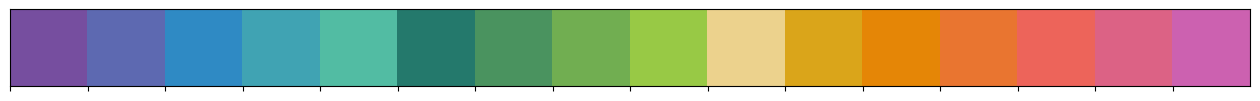

In [78]:
sns.palplot(cmap_)

/c4/home/derek/miniconda3/envs/scquint_4/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


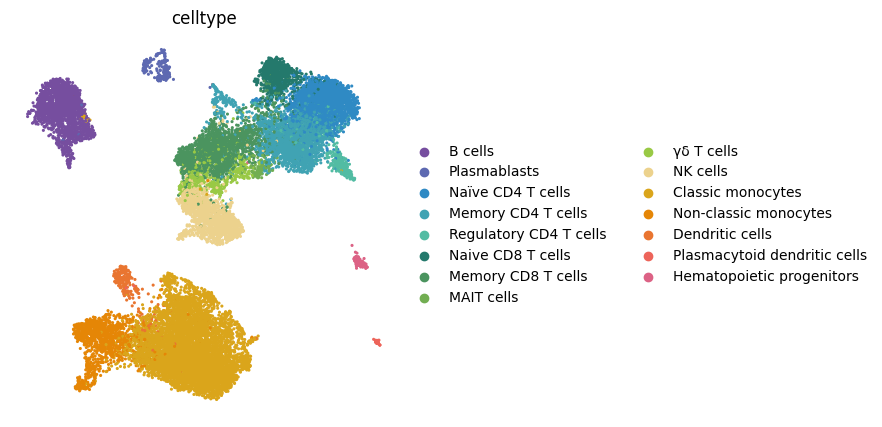

In [79]:
plt.rcParams['figure.figsize'] = 5,5
sc.pl.umap(adata_exp,
          color='celltype',
          palette=cmap_,
          size=20,
          frameon=False,
        #  legend_loc='on data',
         # save="_celltype"
          )

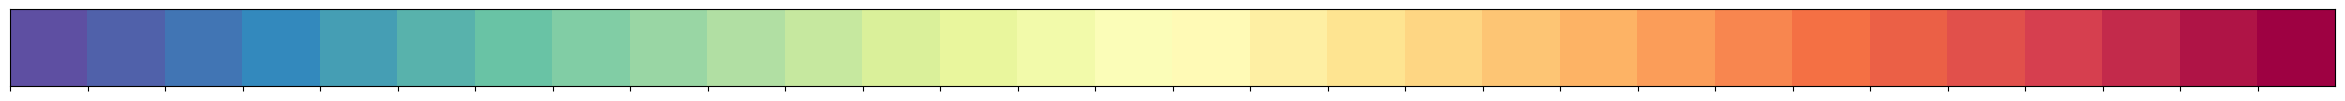

In [21]:
sns.palplot(
    adata_exp.uns['ct2_colors'])

In [94]:
pd.DataFrame(
    zip(adata.obs.C_scANVI_simple.cat.categories,
adata.uns['C_scANVI_simple_colors'],
)
).to_csv('celltype_colors.csv',columns=None,index=None)

In [9]:
##from ivirshup, https://github.com/scverse/scanpy/issues/1513

from adjustText import adjust_text

def gen_mpl_labels(
    adata, groupby, exclude=(), ax=None, adjust_kwargs=None, text_kwargs=None
):
    if adjust_kwargs is None:
        adjust_kwargs = {"text_from_points": False}
    if text_kwargs is None:
        text_kwargs = {}

    medians = {}

    for g, g_idx in adata.obs.groupby(groupby).groups.items():
        if g in exclude:
            continue
        medians[g] = np.median(adata[g_idx].obsm["X_umap"], axis=0)

    if ax is None:
        texts = [
            plt.text(x=x, y=y, s=k, **text_kwargs) for k, (x, y) in medians.items()
        ]
    else:
        texts = [ax.text(x=x, y=y, s=k, **text_kwargs) for k, (x, y) in medians.items()]

    adjust_text(texts, **adjust_kwargs)

with plt.rc_context({"figure.figsize": (8, 8), "figure.dpi": 300, "figure.frameon": True}):
    ax = sc.pl.umap(adata, color='C_scANVI_simple', show=False, legend_loc=None, title=' ', frameon=True, size=20)
    gen_mpl_labels(
        adata,
        'C_scANVI_simple',
        exclude=("None",),  # This was before we had the `nan` behaviour
        ax=ax,
        #adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
        text_kwargs=dict(fontsize=12,fontweight='heavy'),
    )
    
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    

    fig = ax.get_figure()
    fig.tight_layout()

#    plt.savefig(output_dir+'UMAP_celltype.pdf')
    plt.show()

ModuleNotFoundError: No module named 'adjustText'